<div align="center">
  <h1 align="center">Figure 2: Plot timeseries, residuals, and models</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [1]:
import glob 
import numpy as np
import pandas as pd
import nibabel as nib
from numpy import savetxt
from numpy import genfromtxt
from nilearn import plotting
import matplotlib.pyplot as plt
import nilearn.plotting as plotting
from nilearn.maskers import NiftiSpheresMasker

### Choose the HRF 

In [8]:
# Init var
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

glover_path = analysis_folder+'first_level/glover/mask_ROIs/'
spm_path = analysis_folder+'first_level/spm/mask_ROIs/'
Two_gammas_path = analysis_folder+'first_level/Two_gammas/mask_ROIs/'
Peak_span_path = analysis_folder+'first_level/Peak_span/mask_ROIs/'
block_path = analysis_folder+'first_level/block/mask_ROIs/'

hrf_path = Peak_span_path
hrf = 'Peak_span'  #'Peak_span', 'Two_gammas', 'spm', 'glover', 'block'

In [9]:
# --- Compute Average Timeseries and Residuals, per Dataset --- 

all_timeseries = []
all_residuals = []
print('Hrf:', hrf)


for ds_num in range(1, 23):
    
    all_timeseries = []
    all_residuals = []
    
    ds = f'{ds_num:02d}'
    print('Start dataset: ', ds)

    for subj_num in range(0,10):
        try:
            residuals_csv = pd.read_csv(hrf_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-1.csv', header=None).squeeze()
            mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
            all_residuals.append(mean_residuals)             # Append mean residuals to the list
            
            timeseries_csv = pd.read_csv(hrf_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv')
            mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
            all_timeseries.append(mean_timeseries)           # Append mean timeseries to the list
            
        except FileNotFoundError:
            print(f'Cannot find, ds: {ds} sub:{subj_num}')
            continue
        
        # Compute the average of all timeseries/residuals across subjects
    average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
    average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)
        
    average_timeseries.to_csv(f'/project/4180000.19/multirat_stim/scratch/rabies_test/second_level/{hrf}/mean_timeseries/mean_timeseries_ds-{ds}.csv', index=False, header=False)
    average_residuals.to_csv(f'/project/4180000.19/multirat_stim/scratch/rabies_test/second_level/{hrf}/mean_residuals/mean_residuals_ds-{ds}.csv', index=False, header=False)
   
    print('Saved dataset:', ds)

Hrf: Peak_span
Start dataset:  01
Saved dataset: 01
Start dataset:  02
Cannot find, ds: 02 sub:9
Saved dataset: 02
Start dataset:  03
Cannot find, ds: 03 sub:9
Saved dataset: 03
Start dataset:  04
Saved dataset: 04
Start dataset:  05
Saved dataset: 05
Start dataset:  06
Saved dataset: 06
Start dataset:  07
Cannot find, ds: 07 sub:8
Cannot find, ds: 07 sub:9
Saved dataset: 07
Start dataset:  08
Cannot find, ds: 08 sub:9
Saved dataset: 08
Start dataset:  09
Saved dataset: 09
Start dataset:  10
Saved dataset: 10
Start dataset:  11
Saved dataset: 11
Start dataset:  12
Cannot find, ds: 12 sub:9
Saved dataset: 12
Start dataset:  13
Saved dataset: 13
Start dataset:  14
Cannot find, ds: 14 sub:1
Saved dataset: 14
Start dataset:  15
Saved dataset: 15
Start dataset:  16
Cannot find, ds: 16 sub:3
Saved dataset: 16
Start dataset:  17
Saved dataset: 17
Start dataset:  18
Cannot find, ds: 18 sub:6
Saved dataset: 18
Start dataset:  19
Cannot find, ds: 19 sub:6
Cannot find, ds: 19 sub:7
Saved dataset:

### HRF + timeseries + residuals for Fig2

/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/Two_gammas/matrix/matrix_sub-0201800_ses-1.csv


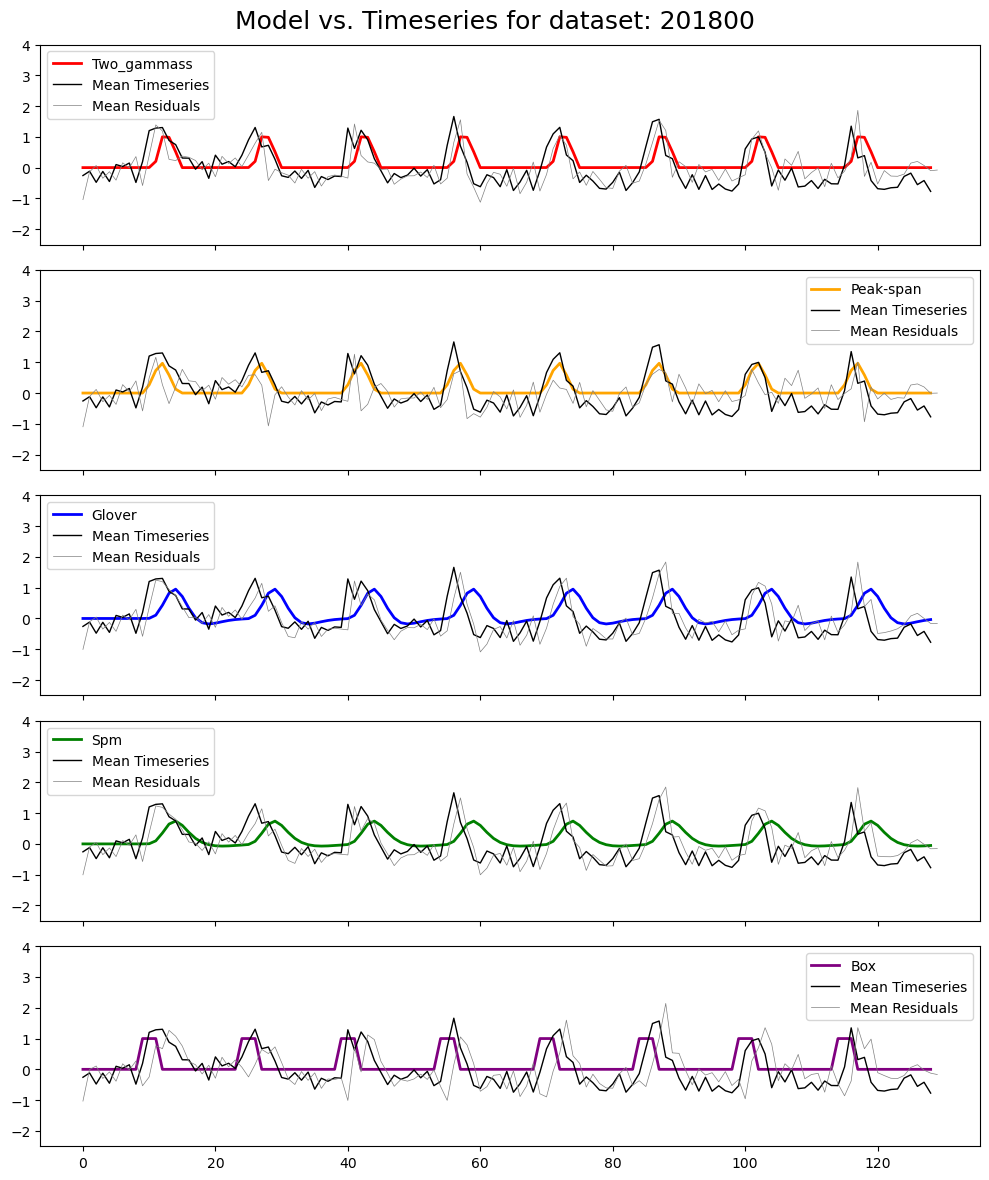

/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/Two_gammas/matrix/matrix_sub-0201900_ses-1.csv


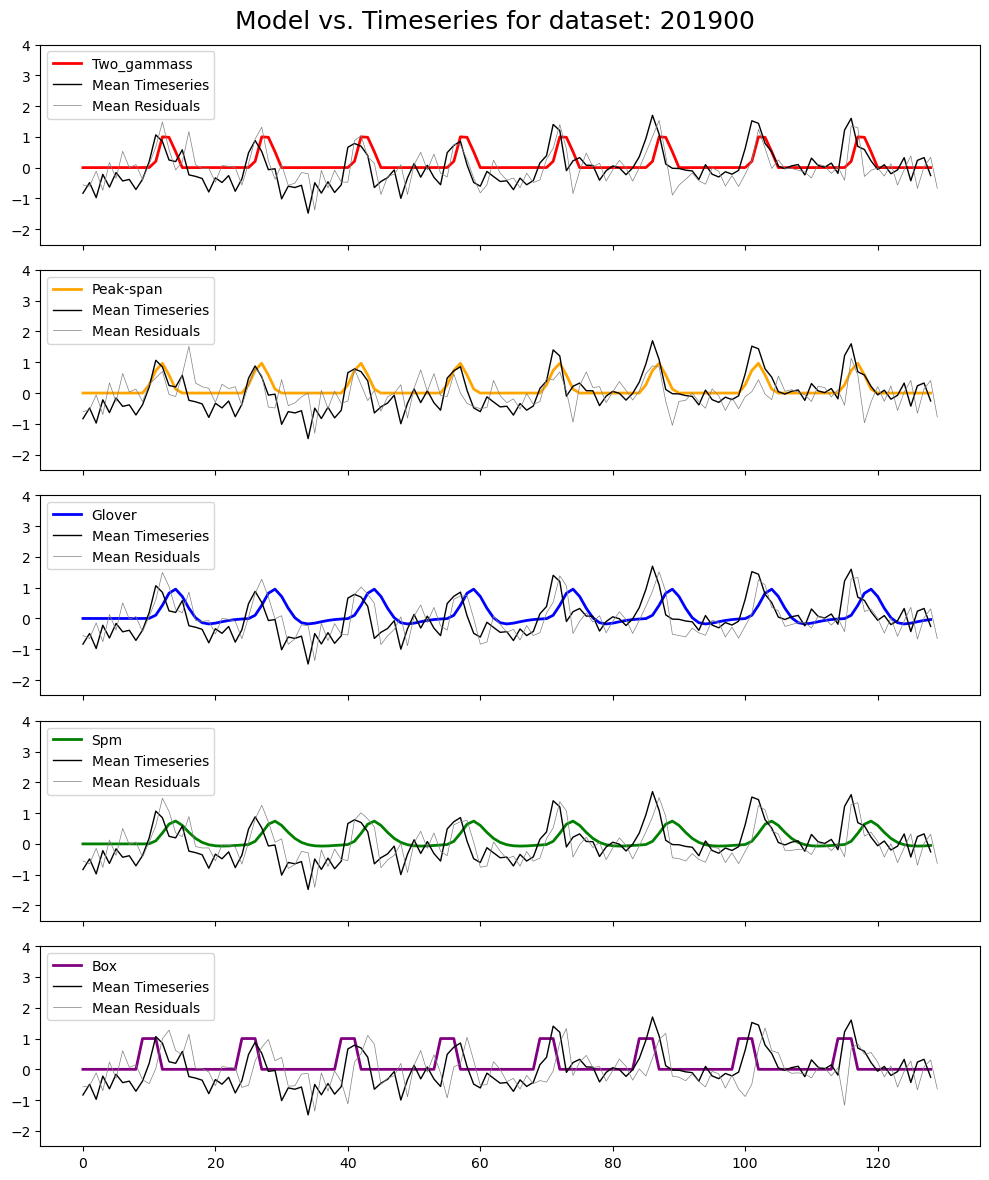

/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/Two_gammas/matrix/matrix_sub-0202000_ses-1.csv


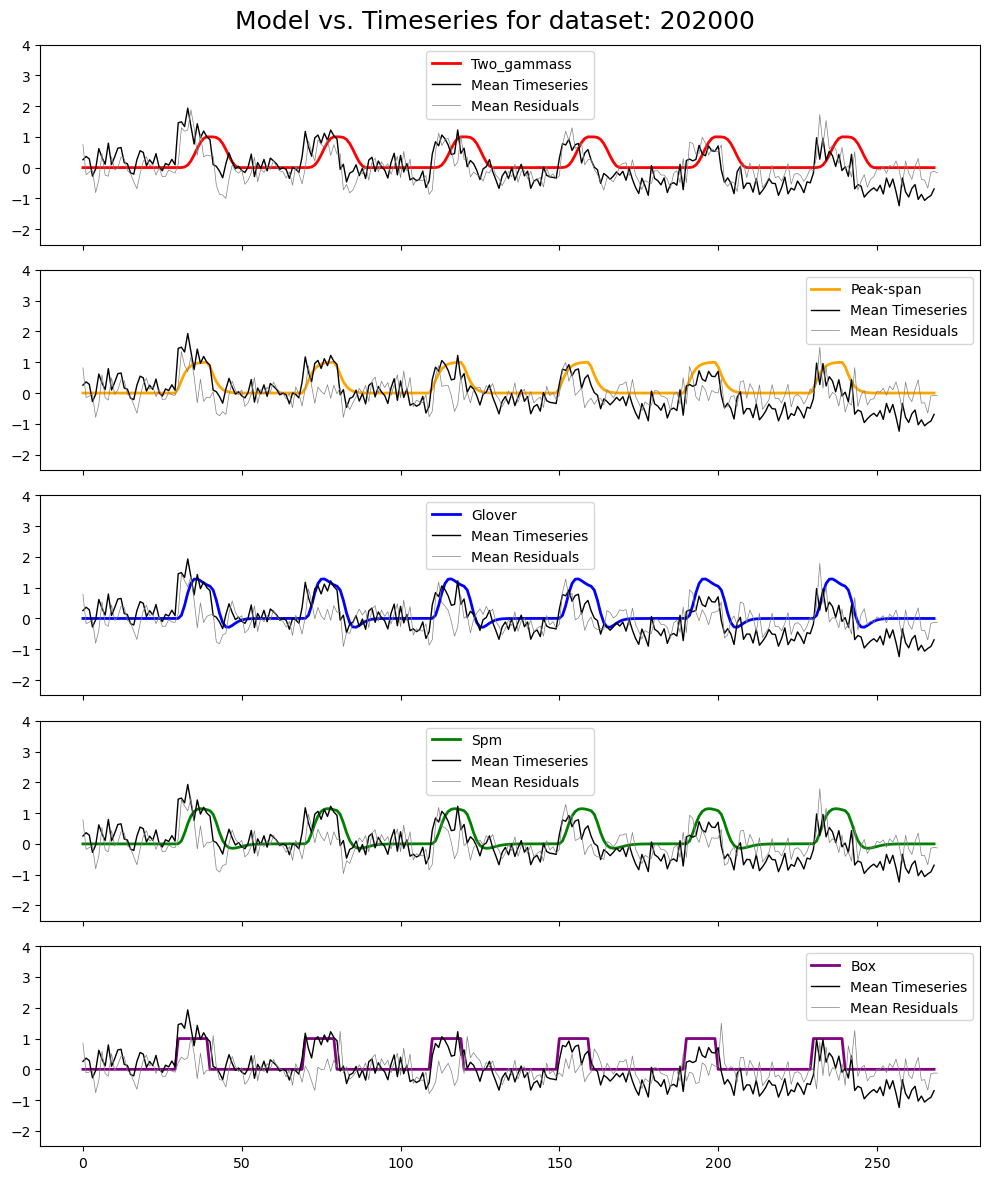

/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/Two_gammas/matrix/matrix_sub-0202100_ses-1.csv


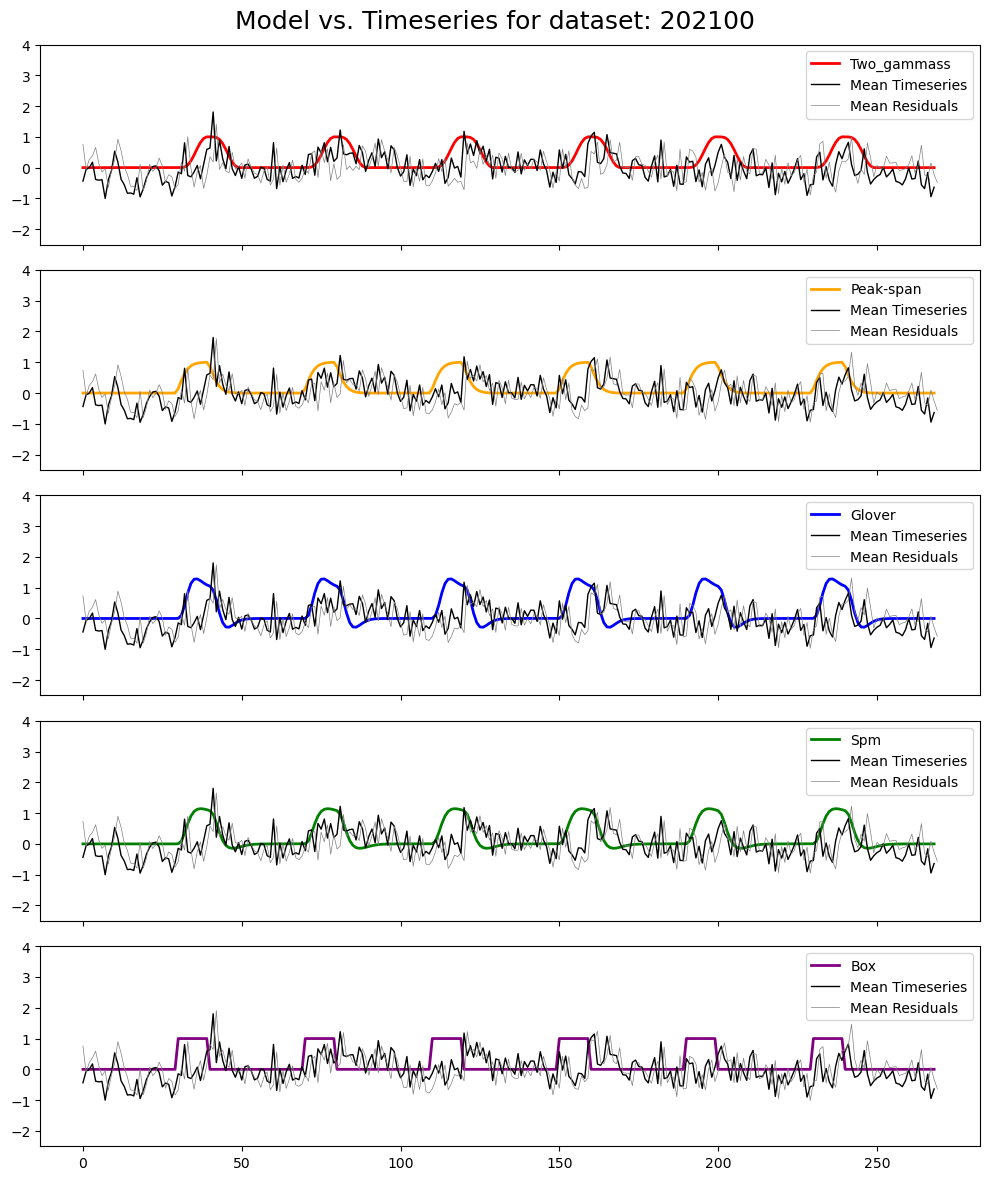

/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/Two_gammas/matrix/matrix_sub-0202200_ses-1.csv


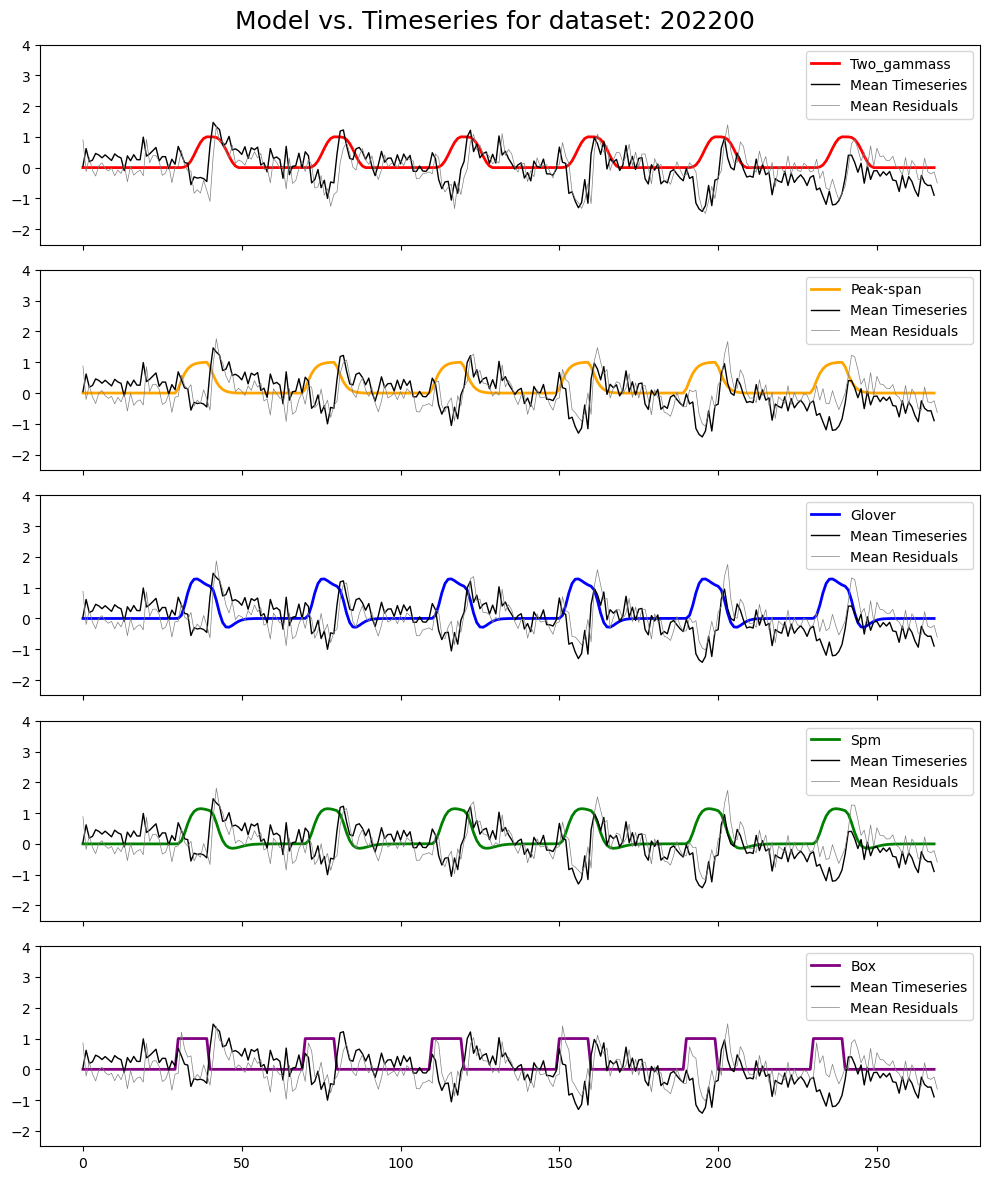

In [20]:
for ds_num in range(18, 23): 
    ds = f'{ds_num:02d}'
    ds_subj = f'20{ds}00'

    # ds = '05'
    # ds_subj = f'20{ds}00'

    average_timeseries = pd.read_csv(analysis_folder+f'/second_level/glover/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).squeeze()

    # --- Load data ---

    Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
    #Two_gammas_model = (Two_gammas_model - Two_gammas_model.mean()) / Two_gammas_model.std()
    Two_gammas_residuals = pd.read_csv(analysis_folder+f'/second_level/Two_gammas/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).squeeze()
    print(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv')

    Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
    Peak_residuals = pd.read_csv(analysis_folder+f'/second_level/Peak_span/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
    glover_residuals = pd.read_csv(analysis_folder+f'/second_level/glover/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
    spm_residuals = pd.read_csv(analysis_folder+f'/second_level/spm/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    block_model = pd.read_csv(first_level_path+f'block/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
    block_residuals = pd.read_csv(analysis_folder+f'/second_level/block/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    # ---  Plot model --- 

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

    ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two_gammass')
    ax1.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax1.plot(Two_gammas_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
    ax2.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax2.plot(Peak_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax3.plot(glover_model, color='blue', linewidth=2, label='Glover' )
    ax3.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax3.plot(glover_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax4.plot(spm_model, color='green', linewidth=2, label='Spm' )
    ax4.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax4.plot(spm_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax5.plot(block_model, color='purple', linewidth=2, label='Box' )
    ax5.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax5.plot(block_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    ax5.legend()
    ax5.legend()

    ax1.set_ylim(-2.5, 4)
    ax2.set_ylim(-2.5, 4)
    ax3.set_ylim(-2.5, 4)
    ax4.set_ylim(-2.5, 4)
    ax5.set_ylim(-2.5, 4)

    fig.suptitle(f"Model vs. Timeseries for dataset: {ds_subj}", fontsize=18)
    plt.tight_layout()

    plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200) 
    plt.show()

(-1.5, 3.0)

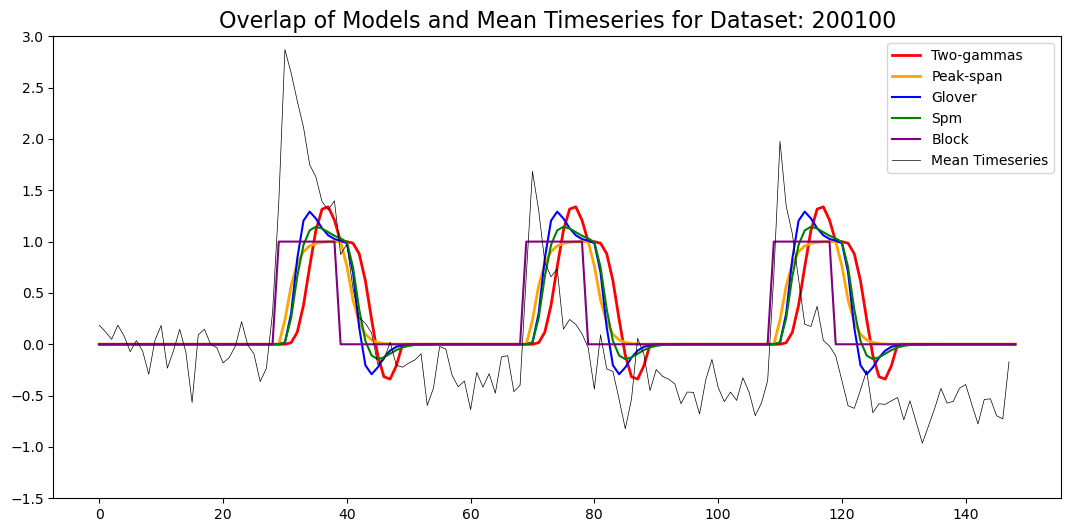

In [35]:
ds_subj = 200100
ses = '1'
ds='01'

average_timeseries = pd.read_csv(analysis_folder+f'/second_level/Peak_span/mean_timeseries/mean_timeseries_ds-{ds}.csv')

# --- Load data ---
Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
box_model = pd.read_csv(first_level_path+f'block/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]

# --- Plot --- 
plt.figure(figsize=(13, 6))

plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )
plt.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
plt.plot(box_model, color='purple', linewidth=1.5, label='Block' )

plt.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')

plt.title(f"Overlap of Models and Mean Timeseries for Dataset: {ds_subj}", fontsize=16)
plt.legend()
plt.ylim(-1.5, 3)

#plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_overlap_{ds_subj}.svg', format='svg', dpi=1200) 

(-1.5, 3.0)

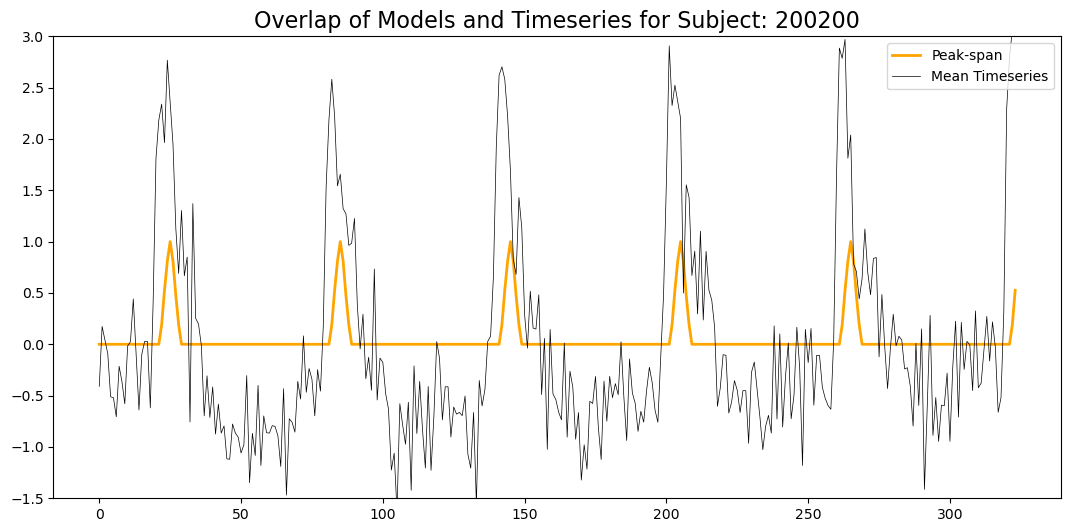

In [ ]:
# --- Compute average for 1 scan at a time --- 
all_timeseries = []
all_residuals = []

ds='02'
ds_subj = '200200'
ses='1'

residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-0{ds_subj}_ses-{ses}.csv')
mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-0{ds_subj}_ses-{ses}.csv')
mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
  
# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,0]
glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,1]
spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,1]
box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv').iloc[:,1]

#savetxt(f'/project/4180000.19/multirat_stim/tmp/2-gammas_ds-{ds_subj}.csv', Two_gammas_model, delimiter=',')
#savetxt(f'/project/4180000.19/multirat_stim/tmp/Peak-span_ds-{ds_subj}.csv', Peak_span_model, delimiter=',')

# --- Plot --- 

plt.figure(figsize=(13, 6))

#plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
#plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )

#plt.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
plt.plot(mean_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')

plt.title(f"Overlap of Models and Timeseries for Subject: {ds_subj}", fontsize=16)
plt.legend()
plt.ylim(-1.5, 3)

#plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_overlap_{ds_subj}.svg', format='svg', dpi=1200) 

### HRF overlap fig4

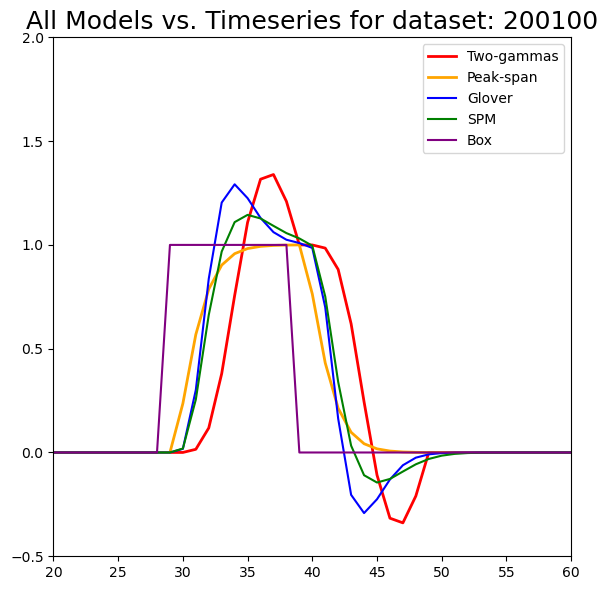

In [44]:
# --- Plot HRF overlap for fig 4 ---

# --- Compute average --- 
all_timeseries = []
all_residuals = []

ds='01'
ds_subj = 200100

for subj_num in range(0,10):
    try:
        residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
        # Append mean residuals to the list
        all_residuals.append(mean_residuals)
        
        timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
        
        # Append mean timeseries to the list
        all_timeseries.append(mean_timeseries)
        
    except FileNotFoundError:
        print(f'Cannot find, ds: {ds} sub:{subj_num}')
        continue
        
# Compute the average of all timeseries/residuals across subjects
average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)

# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
#Two_gammas_model = (Two_gammas_model - Two_gammas_model.mean()) / Two_gammas_model.std()

Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
box_model = pd.read_csv(first_level_path+f'block/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]

# Create a new figure for the combined plot
plt.figure(figsize=(6, 6))

# Plot all models on the same plot
plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span')
plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover')
plt.plot(spm_model, color='green', linewidth=1.5, label='SPM')
plt.plot(box_model, color='purple', linewidth=1.5, label='Box')

# Set x-axis limits to zoom in on the time interval between 80 and 120 seconds
plt.xlim(20, 60)
plt.ylim(-0.5, 2)

plt.legend()
plt.title(f"All Models vs. Timeseries for dataset: {ds_subj}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4//All_HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200)
plt.show()


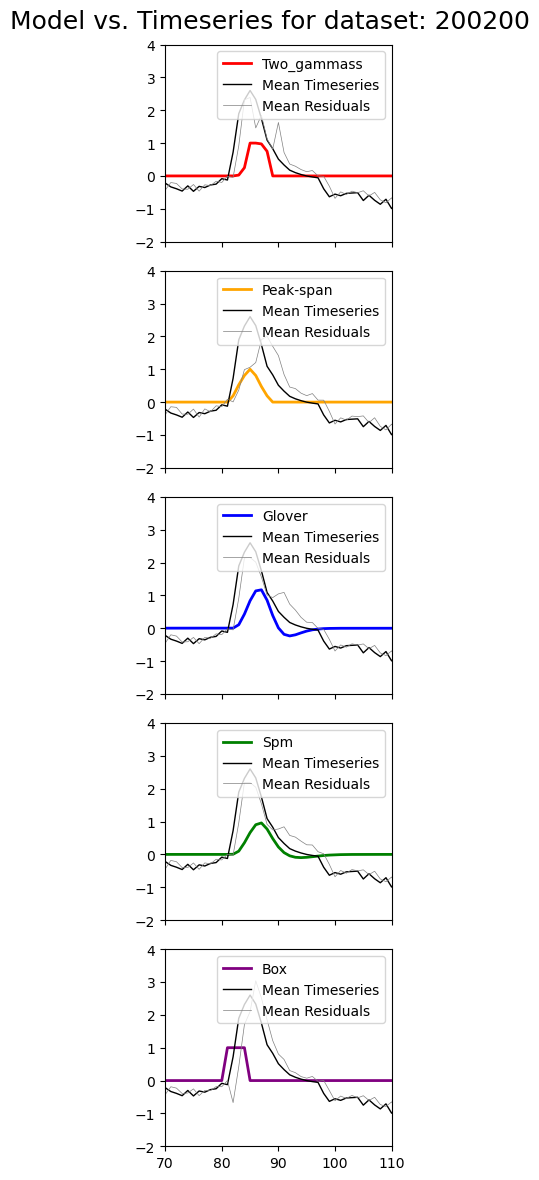

In [43]:
ds_subj = 200200
ds='02'

# --- Load data ---

average_timeseries = pd.read_csv(analysis_folder+f'/second_level/glover/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).squeeze()

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
#Two_gammas_model = (Two_gammas_model - Two_gammas_model.mean()) / Two_gammas_model.std()
Two_gammas_residuals = pd.read_csv(analysis_folder+f'/second_level/Two_gammas/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).squeeze()

Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
Peak_residuals = pd.read_csv(analysis_folder+f'/second_level/Peak_span/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
glover_residuals = pd.read_csv(analysis_folder+f'/second_level/glover/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
spm_residuals = pd.read_csv(analysis_folder+f'/second_level/spm/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

block_model = pd.read_csv(first_level_path+f'block/matrix/matrix_sub-0{ds_subj}_ses-1.csv').iloc[:,0]
block_residuals = pd.read_csv(analysis_folder+f'/second_level/block/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]


# --- Plot ---

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(3, 12), sharex=True)

ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two_gammass')
ax1.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax1.plot(Two_gammas_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
ax2.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax2.plot(Peak_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax3.plot(glover_model, color='blue', linewidth=2, label='Glover' )
ax3.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax3.plot(glover_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax4.plot(spm_model, color='green', linewidth=2, label='Spm' )
ax4.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax4.plot(spm_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax5.plot(block_model, color='purple', linewidth=2, label='Box' )
ax5.plot(average_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax5.plot(block_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# 01
# ax1.set_xlim(20, 60)
# ax2.set_xlim(20, 60)
# ax3.set_xlim(20, 60)
# ax4.set_xlim(20, 60)
# ax5.set_xlim(20, 60)

# 02
ax1.set_xlim(70, 110)
ax2.set_xlim(70, 110)
ax3.set_xlim(70, 110)
ax4.set_xlim(70, 110)
ax5.set_xlim(70, 110)

# 10
# ax1.set_xlim(80, 120)
# ax2.set_xlim(80, 120)
# ax3.set_xlim(80, 120)
# ax4.set_xlim(80, 120)
# ax5.set_xlim(80, 120)


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

ax1.set_ylim(-2, 4)
ax2.set_ylim(-2, 4)
ax3.set_ylim(-2, 4)
ax4.set_ylim(-2, 4)
ax5.set_ylim(-2, 4)

fig.suptitle(f"Model vs. Timeseries for dataset: {ds_subj}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4//HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200)
plt.show()
